# Abstract
ChatGPT is phenomenal.
However, it is prohibitively expensive to train and refine such giant models.
Fortunately, small language models are flourishing and becoming more and more competent.
We call them "mini-giants".
We argue that open source community like Kaggle and mini-giants will win-win in many ways, technically, ethically and socially. 
In this article, we present a brief yet rich background,
discuss how to attain small language models, 
present a comparative study of small language models and a brief discussion of evaluation methods,
discuss the application scenarios where small language models are most needed in the real world,
and conclude with discussion and outlook.

LaTeX version: https://cs.stanford.edu/~zpzhou/MiniGiants2023.pdf 

<div align=center>
<img src=https://github.com/mistylight/picbed/blob/main/Hexo/Screenshot%202023-07-16%20at%201.29.15%20PM.png?raw=true style="width: 70%; display: inline-block">
</div>

# 1. Introduction

Large language models (LMs), like ChatGPT and GPT-4, have taken us by storm. People compare it to the moment of the computer, the moment of the operating system, the moment of the Internet, or the moment of the iPhone. It is considered by many a paradigm shift in NLP and deep learning. 

Large language models are large: OpenAI GPT-3 has 175B parameters, Google PALM 560B, and rumor has it that GPT-4 is as large as 8 × 220B. For most small/medium companies and independent researchers, it is prohibitively expensive to train or update such giant models. In addition, huge consumption of energy for language model training poses a serious concern to the environmental sustainability (Verdecchia et al., 2023).

Recent studies show that network size is not the sole determinant of model performance (Hoffmann et al., 2022). And thanks to the efforts from the ML open source community as well as private AI companies, we've recently seen more and more "small" LMs created out of these larger models. With their network parameter sizes of around or below 10B, and performance comparable or better than ChatGPT / GPT-4, these "small" LMs are indeed "mini-giants".

In this article, we survey the state-of-the-art for these small language models. We show that compared to their large counterparts, small language/foundation models offer particularly promising opportunities for various industries (including open source ML research and Kaggle competitions) to not only utilize but also to actively participate in the creation/adaptation of modern language models and AI in general.

First of all, smaller models offer better adaptability by being more manageable to modify and fine-tune. In Section 3, we present various strategies of creating these small models through optimized fine-tuning techniques. This is important because in most industries (or even in a Kaggle competition), innovation typically arises from the ability to incorporate domain-specific data into the language model or to adjust the model’s structure to accommodate their unique requirements. Relying solely on prompt engineering often falls short. Therefore, smaller language models bring forward great benefits to these industries, offering the much-needed flexibility for adaptation, allowing them to full leverage the power of AI and thus catalyzing innovation within them.

Second, smaller models can run on local infrastructure without resorting to GPU-rich third parties, improving the model’s controllability by ensuring model users’ autonomous data governance and result monitoring. In Section 5, we discuss real world scenarios where small language models fill in the gaps when their large counterparts are unacceptable due to privacy concerns. In Section 4, we also look into strategies for customized instruction following and other pioneer research directions for small models, underpinning the relevance of smaller language models in ensuring compliance and mitigating the risk of misinformation. Understanding and managing the way a model operates, the data it accesses, and the outputs it produces, form the cornerstone of responsible AI usage. 

Another crucial aspect of the superiority of small language models, is affordability. Taking an average Kaggle competitor as an example. The demanding nature of a Kaggle competition requires the competitor to iterate on the modeling solutions, often times by integrating a variety of data sources and trying different architectures. This necessitates transparent model components and fast iteration pace, which is at odds with the resource requirements that super large language models impose. Having access to fast and inexpensive training / inferencing options, means that he/she will not have to face the trade-off between being constrained in their innovation space, and moving away from language model solutions entirely. As another example which is elaborated in Section 5, privacy-sensitive sectors such as finance and healthcare face a more pressing challenge of choosing between regulation risks and the prohibitive cost of training massive models in-house. Small language models provide the opportunity for them to conform with regulations while not missing out on the power of latest AI technologies.

## Outline

In the following sections, we 
first present a brief yet rich background.
Next, we discuss how to attain small foundation models, including parameter reduction and efficient training/fine-tuning techniques.
Then we present a comparative study of “small” foundation models a brief discussion of evaluation methods. After that, we discuss the application scenarios where small foundation models are most needed in the real world.
We conclude with discussions and an outlook.

![Screenshot 2023-07-05 at 4.32.44 PM.png](https://github.com/mistylight/picbed/blob/main/Hexo/Screenshot%202023-07-05%20at%205.21.17%20PM.png?raw=true)

**How popular are the mini-giants within the open-source community?** &nbsp; It is not a trivial job to select the list of mini-giants for the scope of this survey, since we get plenty of them released from the open-source community every month, if not every week. It it not realistic to include all of them in this essay, and the goal is to introduce the audience to a list of mini-giants that are of the highest importance and interest to the open-source community. To tackle this challenge, we wrote a script to collect the latest "small" LM github repos and the star counts from the awesome blog post from [93]. We then manually selected ~10 repos from the top 50 results based on their popularity and novelty. We will discuss them in detail in the following sections.

From the analytics, we can learn that the mini-giants are attracting the attention of the open-source community at a rapid speed: The top one, GPT4All, receives \~50k stars, which is close to the Keras GitHub repo ([\~60k stars](https://github.com/keras-team/keras)) and surpasses the famous vim repo ([\~30k stars](https://github.com/vim/vim)) and Chromium repo ([\~15k stars](https://github.com/chromium/chromium)). This unprecedented popularity motivates us to write this essay.

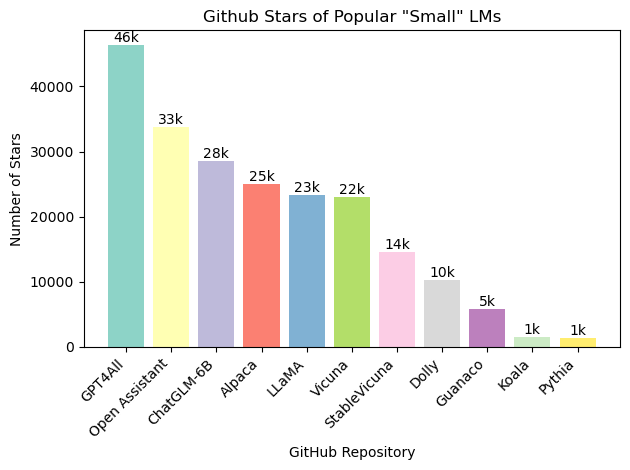

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

"""
NOTE: We use the snippet below to collect the latest github repos and the star counts from the awesome blog post from [93].

Since the snippet has a couple of external dependencies (e.g. chrome driver, github token) which makes it hard to be executed in the kaggle notebook environment, we share the code in the comment and directly present the results.

The results presented in this cell has been filtered based on two factors: (1) whether it proposes a new LM, and (2) the general popularity.

NOTE: If you wish to execute the code locally, please replace all strings in the form of "<...>" with your own version. 
"""

# import re
# import requests
# from bs4 import BeautifulSoup
# from selenium import webdriver

# github_url_and_stars = []

# chrome_driver_path = "</path/to/your/chrome/driver>"
# driver = webdriver.Chrome(chrome_driver_path)

# llm_blog_url = "https://medium.com/geekculture/list-of-open-sourced-fine-tuned-large-language-models-llm-8d95a2e0dc76"
# driver.get(llm_blog_url)
# page_source = driver.page_source

# soup = BeautifulSoup(page_source, "html.parser")
# a_tags = soup.find_all("a", href=True)
# pattern = r"(https://github.com/[A-Za-z0-9_\.-]+/[A-Za-z0-9_\.-]+)"
# links = [re.findall(pattern, tag["href"])[0] for tag in a_tags if re.match(pattern, tag["href"])]
# links = list(set(links))

# for github_repo_url in links:
#     github_repo_api = github_repo_url.replace("github.com", "api.github.com/repos")
#     response = requests.get(github_repo_api, headers={
#         "Accept": "application/vnd.github.v3+json",
#         "Authorization": "<insert your personal access token>"
#     })
#     stars_count = response.json()["stargazers_count"]
#     github_url_and_stars.append((github_repo_url, stars_count))

# github_url_and_stars = sorted(github_url_and_stars, key=lambda x: x[-1], reverse=True)


github_url_and_stars = [
    ("GPT4All", "https://github.com/nomic-ai/gpt4all", 46307),
    ("Open Assistant", "https://github.com/LAION-AI/Open-Assistant", 33807),
    ("ChatGLM-6B", "https://github.com/THUDM/ChatGLM-6B", 28556),
    ("Alpaca", "https://github.com/tatsu-lab/stanford_alpaca", 25022),
    ("LLaMA", "https://github.com/facebookresearch/llama", 23322),
    ("Vicuna", "https://github.com/lm-sys/FastChat", 22961),
    ("StableVicuna", "https://github.com/stability-AI/stableLM", 14636),
    ("Dolly", "https://github.com/databrickslabs/dolly", 10222),
    ("Guanaco", "https://github.com/artidoro/qlora", 5776),
    ("Koala", "https://github.com/young-geng/EasyLM", 1576),
    ("Pythia", "https://github.com/EleutherAI/pythia", 1295),
]

df = pd.DataFrame(github_url_and_stars, columns=["Name", "Github Repo", "Stars Count"])

# Extract repository names and stars
repositories = [repo[0] for repo in github_url_and_stars]
stars = [repo[2] for repo in github_url_and_stars]

# Define a color palette for the bars
color_palette = plt.cm.Set3(np.linspace(0, 1, len(repositories)))

# Create a bar chart
fig, ax = plt.subplots()
bars = ax.bar(repositories, stars, color=color_palette)

# Set x-axis tick locations and labels
x_ticks = np.arange(len(repositories))
ax.set_xticks(x_ticks)
ax.set_xticklabels(repositories, rotation=45, ha='right')

ax.set_xlabel("GitHub Repository")
ax.set_ylabel("Number of Stars")
ax.set_title("Github Stars of Popular \"Small\" LMs")

for bar in bars:
    height = bar.get_height()
    label = str(height) if height < 1000 else f"{int(height / 1000)}k"
    ax.text(bar.get_x() + bar.get_width() / 2, height, label, ha="center", va="bottom")

plt.tight_layout()
plt.show()

**How popular are LMs within the Kaggle community?** &nbsp; We count the number of Kaggle solution writeups containing "language model" or "LM" in their body text from the official Kaggle writeup dataset, and the result is shown below. It can be inferred that language models are gaining an increased popularity within the Kaggle community year by year. The popularity gained its peak at 2022, the year ChatGPT was released, while we expect more to come in 2023. Therefore, we believe portable LMs will be of huge interest to the Kaggle community. The body of this essay will focus on the most recent progress of this field, will also touching the community progress in LM within the recent two years in the background section. 

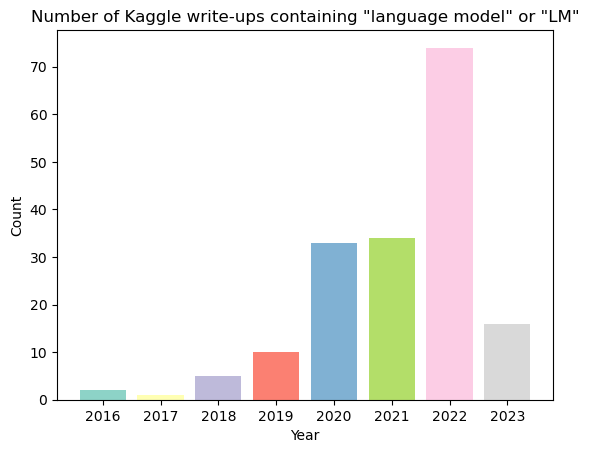

In [2]:
from collections import defaultdict

df = pd.read_csv("/kaggle/input/2023-kaggle-ai-report/kaggle_writeups_20230510.csv", 
                              parse_dates=[0, 3])

# Extract years from timestamps
years = [ts.year for ts in df["Date of Writeup"]]

llm_counts = defaultdict(int)

for year, writeup in zip(years, df["Writeup"].fillna("").values):
    if "language model" in writeup:
        llm_counts[year] += 1
    if "Language model" in writeup:
        llm_counts[year] += 1
    if "LM" in writeup:
        llm_counts[year] += 1
        
llm_counts = sorted(llm_counts.items(), key=lambda x: x[0])
llm_years, llm_counts = zip(*llm_counts)

# Create a bar plot
color_palette = plt.cm.Set3(np.linspace(0, 1, len(repositories)))
plt.bar(llm_years, llm_counts, color=color_palette)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Kaggle write-ups containing \"language model\" or \"LM\"')
plt.show()

# 2. Background

### The Giants are fast

ChatGPT set a record for fastest-growing user base: one million users in five days, and 100 million monthly active users in January 2023, two months after launching.   

[157] introduces generative pre-training for LMs, which could be regarded as GPT-1. 
[158] introduces GPT-2, an unsupervised multitask learning LM.
[27] introduces GPT-3, a few-shot learning LM, popularizing the concept of in-context learning.
[145] introduces ChatGPT and [147] introduces GPT-4.


There are many LMs released in recent years:
Google BERT, Bidirectional Encoder Representations from Transformers [50],
Google T5, Text-To-Text Transfer Transformer [161],
Google LaMDA, Language Model for Dialogue Applications [190],
Google PaLM, Pathways Language Model [41],
Deepmind Sparrow [65],
Anthropic Claude [233],
Deepmind Chinchilla [79]
Nivedia Megatron-Turing NLG [178],
Deepmind Gopher [159],
HuggingFace BLOOM [18],
and Meta LLaMA, Large Language Model Meta AI [193].

### Language models as experts

Besides general purpose LMs as above, there are many specialized models for various application, e.g., Table 1 shows a sample of them.

![Screenshot 2023-07-05 at 4.33.11 PM.png](https://github.com/mistylight/picbed/blob/main/Hexo/Screenshot%202023-07-05%20at%204.56.11%20PM.png?raw=true)

### Language and functional competence

[133] study language competence vs thought competence of LMs and show impressive but imperfect formal linguistic competence, i.e., "knowledge of rules and patterns of a given language",
yet failures on many tests requiring functional linguistic competence, i.e.,"a host of cognitive abilities required for language understanding and use in the real world". 

Then we can leverage LMs’ competence as a good model of language, e.g., by prompt engineering. We can also manage to improve the functional competence, e.g., factuality, safety, and planning. 
With the capacity of in-context learning [27], prompting is a natural and popular way to utilize LMs.
Prompting is the user interface for LMs, and can be formed with advanced methods like search and coding, e.g., Tree of Thoughts (ToT) [216], AdaPlanner [185], Code as Policies [115].
Fine-tuning can improve LMs further. 
A parameter efficient approach makes fine-tuning large LMs feasible considering the cost [81, 51, 168].
Augmenting LMs with tools can achieve various functionalities.

To approach artificial general intelligence (AGI) from language models, [133] suggest that, “instead of or in addition to scaling up the size of the models, more promising solutions will come in the form of modular architectures …, like the human brain, integrate language processing with additional systems that carry out perception, reasoning, and planning”. The authors believe that “a model that succeeds at real-world language use would include -- in addition to the core language component -- a successful problem solver, a grounded experiencer, a situation modeler, a pragmatic reasoner, and a goal setter”. 

### Augmented LMs with tools

A natural way to harnesses the language competence of LMs is by utilizing tools like a search engine, a vector database, a code interpreter, or a solver to handle tasks, e.g., 
[LangChain](https://langchain.com), 
HuggingGPT [172], 
Visual ChatGPT [209],
TaskMatrix.AI [117],
RCI [92],
LLM+P [123],
ChemCrow [25],
etc.
See [139] for a survey about augmented LMs.

Domain expertise is still required, e.g., the ChemCrow [25] authors mention that “However, it is important to emphasize that potential risks may arise for non-experts who lack the chemical reasoning to evaluate results or the proper lab training, as conducting experiments still necessitates thorough laboratory experience.” and the director of the movie trailer mentions that “For those who believe that AI will do everything for you: No!” and “I’ll always prefer to put my own heart & soul in.” ([source](https://twitter.com/ChristianF369/status/1651607149804498946))


### Mini-Giants are coming

Following the leakage of LLaMA [193], 
many “small” LMs appear in the open source community, with neural network parameter sizes of around 10B or smaller, e.g., 
Alpaca [188], 
Dolly [44], 
Koala [64], 
Vicuna [38], 
StableLM [181], 
ChatGLM [55, 224], 
Guanaco [49],
Pythia [17],
[GPT4All](https://github.com/nomic-ai/gpt4all),
[Open-Assistant](https://github.com/LAION-AI/Open-Assistant),
ColossalChat [218].
See [93] for a list of open sourced fine-tuned LMs. In the survey section, we will discuss and compare these mini-giants in details.



### Discussions & debates abound


There are all sorts of discussions & debates, e.g. discussions about AI alignment with human value from [170, 140, 42]. Table 2 lists a few representative examples. 

![Screenshot 2023-07-05 at 4.33.54 PM.png](https://github.com/mistylight/picbed/blob/main/Hexo/Screenshot%202023-07-05%20at%204.56.20%20PM.png?raw=true)

# 3. How to make large foundation models "small"

![](https://github.com/mistylight/picbed/blob/main/Hexo/Screenshot%202023-07-16%20at%204.57.57%20PM.png?raw=true)

Since the advent of ultra-capable large foundation models like ChatGPT and StableDiffusion, numerous efforts have been devoted to address the primary challenges for their wide-spread utilization: their humongous parameter sizes and the sheer time and compute resources needed to fine-tune them. Within 2 years, the research and open source community have arrived at several strategies to cope with this issue, which we will discuss in this section. 

We classify these strategies into 2 groups: ones that directly reduce the parameter sizes, and ones that makes fine-tuning large models more efficient.

## Foundation models with reduced parameters

**Chinchilla** 
[79] is the first influential study on computational efficiency of modern large language models. It put forward the argument that given a compute budget, the best model is attained not by larger parameter size, but by more training data tokens. Based on this principle, the authors produced the Chinchilla 70B model which out-performs prior large models 4 times as large, with the same amount of compute. 

**LLaMA** 
[193] further reduces the parameters and released a series of models ranging from 7 to 65B parameters, following the Chinchilla computation rule. Notably, the paper used only publicly available datasets as training corpus and proved comparable performance as closed source counterparts. This, as commented by [74], started a revolution of open source LLM models. Along with parameter reduction, another contribution by the authors is efficient implementation of multi-headed attention layers through the open source *xformers* library, which optimizes the memory consumption in training.

## Efficient fine-tuning strategies for foundation models

Compared with building even more compact models, the majority of research work by the ML community in the direction of "smaller" foundation models, is around making them easier to fine-tune. Here we list several key strategies to achieve this.

**Adapter**
[80] is a strategy to add NN layers after existing layers (usually transformer blocks) in pretrained foundation models, so that they can be adapted to custom tasks without changing the weights of existing layers. This paper proposes an adapter module with two linear layers plus a non-linear activation in between. The first layer projects the hidden state to a lower-dimensional space, and the second layer projects it back to the original dimension. A newer paper [121] recommended only one linear layer plus an additional LayerNorm, as an Adapter module. Adapter achieves near state-of-the-art performance, while adding only a small amount of parameters per task - on GLUE, the added parameters accounted for 3.6% of the original model.
    
**Prefix fine-tuning** 
[111] Unlike the Adapter architecture that focuses on modifying model behavior via model params, Prefix fine-tuning seeks to train a few params that are used as input prefixes, for each custom sub task. The authors commented that the method is inspired by prompting: similar to prepending a few sentences before a generation task, Prefix-tuning prepends a sequence of trained vectors to the input - just that the prefix vectors do not have to correspond to any real tokens. Compared to full fine-tuning, prefix-fine tuning achieves comparable or better performance with just 0.1% added parameters.

**LoRA**
[81] Marks a substantial progress in parameter efficient fine-tuning. Performance-wise, it is more efficient than previous methods like Adapter and Prefix-finetuning. LoRA proposes that we add a low rank, trainable matrix in parallel to the frozen,  pretrained model weights. The activation will be the sum of these two matrices. Formally:
    
$$ h = W_0 x + \Delta W x = W_0 x + BAx $$ 

where $B$ and $A$ are much "thinner" (i.e. low rank), trainable matrices compared to $W_0$ (the frozen pretrained matrix). The use of low rank matrices reduces trainable parameters to as much as by 10,000 times of the original model, compared to a full fine-tune of GPT-3 175B. The article suggests that LoRA can be used next to any model weights, not just transformer layers. The authors claim that LoRA is superior compared to Adapters in that it doesn't introduce additional inference latency; and it's better than Prefix fine-tuning in that it doesn't reduce the available sequence length like the latter does. Further more, since this architectural modification is orthogonal to the ideas of Adapter and Prefix fine-tuning, LoRA can be used in conjunction with them for even better results.

**QLoRA**
[49] As an improvement of LoRA, QLoRA proposes optimization methods via quantized low rank fine tuning. Innovations of QLoRA include a 4-bit data type: NormalFloat4, which optimizes information efficiency for normally distributed data (e.g. weights) based on information theory. Apart from that, the paper uses Paged Optimizers (partial optimizer state stored on CPU rather than GPU) to manage memory spikes, like when processing mini batches with long sequence lengths. Experiment results show that fine-tuning using QLoRA reaches 99.3% of the performance of ChatGPT, and only requires training for 24 hours on one GPU.

**ControlNet**
[226] is proposed as a method to efficiently fine-tune image generation models (diffusion model) on user-defined tasks. Because image generation models in general have a larger design space in terms of user interaction than language models, we list this method here to inspire the readers to consider more complex scenarios of controlling / customizing large foundation model's outputs.
    
ControlNet copies weights of the original model to a frozen copy (ike all methods mentioned above). The trainable branch consists of an exact same copy as the frozen copy, as well as two convolution layers called "zero convolutions", both before and after the trainable copy. In the fine-tuning forward path, the activation from the trainable copy will be combined with that of the frozen copy by Zero Convolution. The so-called Zero Convolution is just a 1x1 convolution layer that are initiated with both weights and biases being zeros. The result of using ControlNet shows that in some tasks, ControlNets on a personal computer achieve comparable results as commercial models trained on terabytes of GPU memory and thousands of GPU hours. 

# 4. A brief survey of “small” LMs

Over the past few months, we have seen small LMs flourish. See Figure 1 for an evolution tree and Table 3, 4 for comparisons.
This is a very fast progressing field, and it is challenging to even keep ahead with the latest progress.
Quoting [29], "Trying to get ahead in AI these days feels like wrestling a rabid 5,000 lbs hippo covered in baby oil".


## Closed-source milestones

**GPT-3** 
    [27] gained public attention when it was released in 2020. As reported by New York Times, it "generates tweets, pens poetry, summarizes emails, answers trivia questions, translates languages and even writes its own computer programs" [137]. It shows that decent few-shot performance can be achieved  without gradient update, and the unprecedented model scale (175B parameters) is a key ingredient for success.

**InstructGPT** 
    Although GPT-3 is already powerful, [150] points out that the model output may not align well with human intent and may contain harmful content. For example, when prompted to generate a story, the LM should generate a story instead of rambling around the prompt itself. This necessitated an extra step called *model alignment*, and the desired model behavior is called *instruction-following*. In InstructGPT, this is achieved by applying the reinforcement learning from human feedback (RLHF) [42] technique on top of a GPT-3 backbone. Despite having 100x less parameters, InstructGPT outperforms the unaligned GPT-3 model in human evaluation, giving rise to the phenomenal success of ChatGPT ten months later.

**ChatGPT** 
    [145] brings AIGC to the attention of the general public. It uses the same technique as InstructGPT, but extends InstructGPT by incorporating dialogue data into the supervised fine-tuning and the RLHF stage. It acquired 1 million users in just 5 days and revolutionizes the way people interact with modern AIs. As a proprietary product, although the web UI is free, the underlying model can only be accessed via a paid API. 

## Open-source backbone LMs

**LLaMA** 
    Despite the recent success of GPT-3 and ChatGPT, training and deploying LLMs remain a major challenge to the open source community due to the high training infra cost. For instance, the GPT-3 training is estimated to cost millions of dollars. [193] propose LLaMA, an open source LLM pretrained with public data available at several sizes. Remarkably, the 13B LLaMA model benefited from large scale pretraining data (1.4T tokens), and outperforms the 175B GPT-3 on most benchmarks. It soon becomes a highly influential milestone in the open source world, serving as a powerful yet lightweight backbone for a wide range of subsequent instruction-following small LMs. The non-commercial bespoke license, under which it is released, limits the usage to research purpose only. 


**Pythia**
    [17] Published two months later than LLaMA, Pythia releases a suite of 16 LLMs ranging from 70M to 12B parameters. Trained with 300B tokens from the Pile [60], it consumed a similar amount of data as GPT-3 but around four times less than LLaMA (see Table 3 for comparison). Released under the Apache 2.0 license, Pythia is free for commercial use, making it an appealing backbone for many subsequent instruction-following small LMs (e.g. Open Assistant [96], Dolly 2.0 [44]).
    
![Screenshot 2023-07-05 at 4.49.51 PM.png](https://github.com/mistylight/picbed/blob/main/Hexo/Screenshot%202023-07-05%20at%204.56.32%20PM.png?raw=true)

       

## Small LMs trained with GPT synthetic data 

Since the release of LLaMA, open-source instruction fine-tuned small LMs emerge at a rapid speed. Viewing LLaMA as an open-source counterpart of GPT-3, these small LMs can be seen as the open-source counterparts of InstructGPT or ChatGPT. Most of them can be fine-tuned under a feasible budget (the training hardware cost can be capped under several hundred dollars).

A major challenge is to obtain high-quality instruction-following data, a key ingredient in the model alignment stage. 
At an early stage, the open-source community tackles this challenge by using GPT-3.5 [145] to synthesize the response of a given prompt. This imposes a non-commercial license on the fine-tuned model. 

**Alpaca** 
    [188] is the first newborn in this family.  It fine-tunes LLaMA-7B with 52k instruction-following data generated using the self-instruct method, which leverages GPT-3.5 to synthesize prompt-response pairs from a manually created seed set. According to human evaluation, it achieves similar performance to GPT-3.5 on a small sample data. 

**GPT4All**
    [5] fine-tunes LLaMA-7B with 437k prompt-response pairs. The instructions are collected from the `unified_chip2` and Stackoverflow Questions, while the responses are generated by GPT-3.5. The model is fine-tuned using the LoRA [81] algorithm. Evaluated using the ground truth perplexity on the Self-Instruct [201] human evaluation data, GPT4All stochastically outperforms Alpaca.

**Vicuna**
    [38] fine-tunes LLaMA-13B with 70k user-shared conversations with ChatGPT (from ShareGPT.com). Compared to Alpaca, it accounts for multi-turn conversation in training, and made several optimizations to cut the training cost. Vicuna uses GPT-4 as an automatic chatbot judge, based on which it outperforms LLaMA and Alpaca, while achieving more than 90% quality of ChatGPT. A more rigorous analysis validating this evaluation approach is later presented in the Guanaco work [49].

**Koala**
    [64] is another instruction fine-tuned LLaMA model, with 13B parameters. It is a concurrent effort with Vicuna, released at a similar time. Like Vicuna, it is fine-tuned on ChatGPT-distilled data, with a focus on the dialogue scenario. In human evaluation, Koala achieves comparable or superior results compared to Alpaca. 

## Small LMs trained with human-curated data 

**Dolly 1.0** 
    [44] trains a two-year-old GPT-J-6B backbone using the same data as Alpaca, showcasing that the instruction-following capability does not necessarily require state-of-the-art backbone model as long as the data quality is decent. **Dolly 2.0**, released one month later, upgrades to the newly released Pythia-12B [17] backbone and is instruction fine-tuned using a newly crowd-sourced dataset, `databricks-dolly-15k` which contains 15k human-generated prompt-response pairs. Notably, it is the first open-source instruction-following small LM that permits commercial use.  

**Open Assistant**
    [96] uses LLaMA-13B and Pythia-12B as the backbones, allowing it to release chatbots under either non-commercial and commercial licenses. It also releases the OpenAssistant Conversations (`oasst1`) dataset, which contains 66k conversations generated by human, accompanied with quality ratings. It also includes human preferences for the model responses, which enables RLHF training. After fine-tuning on this dataset, Open Assistant achieves a 48.3% v.s. 51.7% as compared to ChatGPT. As a high quality human-generated dataset free of GPT-synthesized content, `oasst1` is widely used in follow-up works.

**StableVicuna**
    After the release of the `oasst1` dataset,  [182] proposes StableVicuna, "the AI world's first open-source RLHF LLM chatbot". It is fine-tuned on the Vicuna-13B model using a mix of the prompt-response datasets from Open Assistant, GPT4All, and Alpaca. The model is further optimized using RLHF with human preference data from Open Assistant, HH-RLHF [10], and SHP [58]. By the time StableVicuna is released, it outperforms other similarly sized open-source chatbots on a number of question-answering benchmarks.

**Guanaco** 
    [49] introduces an efficient fine-tuning approach called QLoRA. As a by product, the chatbot Guanaco-65B fine-tuned on top of LLaMA achieves state-of-the-art results in human evaluation. It also releases the 7B/13B versions which are of a similar scale as previously mentioned small LMs. The fine-tuning dataset is a mix of `oasst1` [96] and some other public datasets.
    
![Screenshot 2023-07-05 at 4.50.06 PM.png](https://github.com/mistylight/picbed/blob/main/Hexo/Screenshot%202023-07-05%20at%204.56.46%20PM.png?raw=true)



## Community trends and research directions

In addition to trained models shown above, we would like to point out a few research trends around the topic of making small language models more efficient and performant. We discuss studies on accelerated training for large language models, performance improvement strategies, the scaling rules of large models, as well as the evaluation frameworks.

### Acceleration and optimization

[78] proposes Backpack, a new network architecture to consider performance, interpretability and control.
In Backpack, each word a vocabulary is associated with multiple learned non-contextual sense vectors, and a word in a sequence is represented as a context-dependent, non-negative linear combination of its associated sense vectors.
The authors show that a 170M-parameter Backpack LM on OpenWebText has a comparable loss of a 124M parameter GPT-2 small, and,  Backpack sense vectors outperform word embeddings of a 6B-parameter Transformer LM on lexical similarity evaluations.

[126] proposes Sophia, Second-order Clipped Stochastic Optimization, an optimizer with light-weight estimate of the diagonal Hessian as the pre-conditioner to improve the popular, state-of-the-art optimizer Adam. 
Sophia attains half the number of steps, total compute, and wall-clock time compared with Adam with GPT-2 of sizes from 125M to 770M. The authors also prove theoretical properties of Sophia.


[120] proposes Activation-aware Weight Quantization (AWQ), "a hardware-friendly approach for LLM low-bit weight-only quantization", exploiting the observation that "protecting only 1% of salient weights can greatly reduce quantization error".

### Performance improvement

[128] proposes a fine-tuned LLaMA-based model Goat to outperform GPT-4 on arithmetic tasks, due to consistent tokenization of numbers by LLaMA. The authors decompose challenging tasks like multi-digit multiplication and division into learnable tasks and leverage basic arithmetic principles. The authors show that Goat-7B can be trained with LoRA on a 24GB VRAM GPU.

[152] proposes a finetuned LLaMA-based model Gorilla to surpass GPT-4 on writing API calls.
With a document retriever, Gorilla adapts to document changes like user updates and version changes and mitigates hallucination. 
The author also introduce APIBench, a dataset including HuggingFace, TorchHub, and TensorHub APIs.

### Study with scaling law

[57] shows that LMs with <10M parameters and one Transformer block can generate fluent and consistent stories of several paragraphs with close to perfect grammar. 

[70] introduces phi-1 and show good coding performance with 1.3B parameters and 7B training tokens, with a selection of “textbook quality” data.



[48] studies the downscaling effects with the shrunk language, 
showing the benefits of pre-training for models of 1.25M parameters and
that compute-optimal models break the power law.
[138] provides 11 datasets  for empirical analysis of inverse scaling laws and discuss the important of data and objectives for training LMs.
[230] proposes NeQA, a dataset containing questions with negation and exhibit inverse scaling, U-shaped scaling, or positive scaling.
Before this, the popular view follows 
scaling laws that  the overall cross-entropy loss of an LM improves with the increased scale of model, dataset and compute for training [87], 
and that the model and data should be scaled equally for compute-optimal training [79].

### Evaluation for instruction-following LMs

Fairly assessing the performance of instruction-following LMs poses a challenging task, given the extensive variety of tasks it must handle, including question answering, mathematics problem solving, coding and debugging, translation, and more. Furthermore, assessing the quality of chatbot responses is highly subjective in nature.  

Most instruction-following small LMs mentioned in the above sections are evaluated by a few human evaluators on a small sample data. For instance, Alpaca [188] is evaluated by five students on around two hundred comparisons against `text-davinci-003`. Koala [64] is evaluated by 100+ people on 180 test queries. Open Assistant [96] is evaluated using 7,042 manual comparisons on a sample of 22 prompts. 

On the other side, Vicuna [38] employs GPT-4 as a proxy evaluator across 80 questions. This approach gains further support from Guanaco [49], wherein both GPT-4 and humans are used to evaluate 953 user queries. The comparison demonstrate that GPT-4 evaluations serve as a "cheap and reasonable" substitute for human evaluation.

Evaluation of LMs in general, not just the instruction-following ones, continues to be a significant challenge and an active area of research. We delve deeper into this topic in the next section.


## Evaluation

Evaluation feedback is valuable for researchers and engineers to improve learning algorithms. Evaluation and benchmarks for natural language processing, in particular, language models and interactive applications, have been enjoying steady progress. However, it is still challenging for research and development. Burnell et al. (2023) present guidelines for robust evaluation practices with more granular reporting, in particular, in-depth performance breakdowns beyond aggregate metrics and instance-by-instance evaluation results.

Gehrmann et al. (2022) survey obstacles in evaluation of test generation and propose to evaluate a model with multiple datasets via multiple metrics and document human evaluation well. The authors propose the following best practice & implementation: make informed evaluation choices and document them, measure specific generation effects, analyze and address issues in the used dataset(s), evaluate in a comparable setting, run a well-documented human evaluation, produce robust human evaluation results, document results in model cards, and release model outputs and annotations.

Srivastava et al. (2022) propose the Beyond the Imitation Game benchmark (BIG-bench) with more than 200 tasks. Liang et al. (2022) propose Holistic Evaluation of Language Models (HELM) to improve transparency of LMs, with 1) a taxonomy of LM evaluation design space w.r.t. scenarios and metrics, 2) a broad coverage of 16 core scenarios with 7 metrics, i.e., accuracy, calibration, robustness, fairness, bias, toxicity, efficiency, together with 7 targeted evaluations of skills and risks and 21 new scenarios, and 3) evaluation of 30 existing models.

Lee et al. (2022) propose Human-AI Language-based Interaction Evaluation (HALIE) beyond non-interactive evaluation by considering targets (full process and final output), perspectives (first-person and third-party), and criteria (preference and quality).

Pythia (Biderman et al., 2023) is a suite of 16 LMs with sizes from 70M to 12B parameters and public access to checkpoints for each models to analyze the developments and evolutions of LMs over the course of training.

Shumailov et al. (2023) discuss the issue of model collapse due to training with generated data from LMs and show the importance of genuine human data for LMs.

# 5. Applying “Mini-Giants” to the real-world

"Mini-giants" are uniquely positioned to solve two important issues unaddressed by larger language models: privacy protection and local computation. We examine the application of these smaller models in real-world scenarios, using the therapeutic chatbot Woebot as an example. Cognitive Based Therapy (CBT) took several years from being popular in Woebot, to become closer to clinical ready. 

Before delving into the discussion, let’s clarify the definition of small language models. Recall that by today’s standard, small LMs are the models with parameter sizes of around 10B or lower and with performance comparable or better than ChatGPT / GPT-4. However, this is a definition based on today’s technology capabilities. With the development of hardware and other optimization softwares, there will definitely be “mini-giants” with much more network parameters in the future. Therefore, to future-proof our discussion on applications, we use a more extensible definition for a “mini-giant”: a language model which can be trained/modified/used with affordable resources, like with a single GPU and an open source developer today.

Compared to their larger counterparts, “Minigiants” offer two advantages: privacy protection
and computation efficiency. Users wishing to utilize language models have two primary choices. They can either utilize APIs provided by organizations like OpenAI, or build their own "mini-giants". If they choose the former, it is expected that their proprietary data will go through third party’s servers and be logged, which would be unacceptable to sensitive industries such as financial or health care institutes. On the other hand, "Mini-giants" permit centralized user data storage, potentially on a single GPU. For example, “Alpaca-Lora” can run locally on affordable hardware like a Raspberry Pi. In terms of computation efficiency, in industries like autonomous driving, high network latency may occur when connecting to remote data centers. Hence, it’s crucial that the language model can function independently. 

To demonstrate "mini-giants" advantages, we examine Cognitive Based Therapy (CBT), an effective technique for treating clinical depression. Moving CBT from casual to clinical use is a demanding process, involving extensive clinical trials. Woebot, an AI chatbot, incorporates CBT into daily use, providing around-the-clock mental health support and anxiety reduction. The company Woebot was founded by Alison Darcy, a psychology student who worked as a software engineer, and then joined Stanford as a postdoctoral researcher in clinical psychology in 2017. Since its establishment, it received endorsement from AI pioneers such as Andrew Ng, who became one of the board of directors in 2017. The chatbot is a popular App with 4.7 rating out of 5, and more than 5,900 reviews in July 2023, and exchanges millions of messages with users every week in 2021 (Steven Loeb, 2021). However, despite great user reviews, it took more than two years for the company to go through the clinical trials process and get closer to being endorsed by mental health doctors. Woebot first posted their clinical trials recruitment notice on ClinicalTrials.gov in 2019, and designed a process to recruit 101 participants to evaluate whether this chatbot can help in alcohol use disorders etc. It took around 5 months to complete the study in 2020, and the results were first posted in Aug 2022. (Woebot Health, 2022). In 2023, Woebot announced the enrollment of the first patient in a pivotal clinical trial to evaluate if it can help women with postpartum
depression (Woebot Health, 2023). Their paper published in Expert Review of Medical Devices (Darcy et al., 2022) documented the clinical trial process.

The reader might ask why it takes such a complicated experimentation process to adopt a new technology in clinical trials and go through the U.S. Food & Drug Administration (FDA) process. The answer is simple. If your families and friends are going to go to a doctor and look for some mental health help, what evidence would you need to decice a chatbot is as trust-worthy as a doctor? 

In short, “mini-giants” a.k.a. “small” language models had some unique advantages in privacy protection and computation efficiency. However, their successful integration into specific domains like healthcare requires adherence to industry standards, a frequently long process involving more than just technological consideration

# 6. Discussion and outlook

As the capability of large foundation models and AI becomes increasingly well-known to the general public, the demand for AI democracy becomes an issue of societal fairness and equity. In our opinion, the open source community and "small" language models mark one step towards facilitating AI democracy, making it easier for everyone to control, adapt, interpret and afford the power of AI.

* **Adaptability**: For the open source communities including Kaggle, the ability to innovate comes from the capability to use the model in ways that are best suited to domain specific scenarios. Prompt engineering alone is not enough. Thanks to methods mentioned in **Section 3**, fine-tuning even complex model architectures can mostly be achieved on a single or a few GPUs. Without this, the role of ML researchers without an unimaginable amount of resources risks being diminished to prompt engineers.

* **Controllability**: Being able to choose where to run the model, what data is seen by the model, and what model outputs are used relies heavily on the model being easy enough to run on local infrastructure, and model components are transparent and interpretable. **Section 4** listed a wide range of options to select from for research and/or business use, which leverage the power of large foundation models and at the same time keeps data local. Moreover, with smaller models, users will have a better chance tuning it with instruction following strategies, to further reduce misinformation and ensure the compliance requirements for model outputs. This increases the chance of successful AI application in compliance-demanding domains.

* **Affordability**: Having access to smaller models and cheaper training / fine-tuning options is the only way that privacy-sensitive industries and applications can avoid the trade-off between giving up the right of autonomous data governance, and squandering unreasonable amounts of funds on training gigantic models in-house. As mentioned in **Section 5**, the affordable option to build domain-specific "small" language models enables industries like finance and healthcare to leverage AI without risking leaking sensitive data to unwarranted third parties. In this sense, lowered costs brought about by these "small" models can prevent the privilege of using AI from falling into the hands of a few exclusive entities.

To sum up, being users of new achievements like GPT-4 is great. Being builders and/or owners of innovations is even better. As technology optimists, the authors believe that it is only through the ability to understand and leverage AI that the society as a whole can mitigate the potential AI risks. With a well designed paradigm, the open source community and small language models can increase the chance for all to benefit from, and to contribute to, the power of AI.

## Acknowledgments
The authors would like to thank Yiyao Liu and Qibin Chen for offering constructive feedback and valuable insights. 
The authors used ChatGPT to edit several sentences in the essay with the following prompt: *Revise to more concise, formal, and fluent, following the style of an academic research paper: [Insert sentence]*.

## References

[1] Adaptive Agent Team, Jakob Bauer, Kate Baumli, Satinder Baveja, Feryal
Behbahani, Avishkar Bhoopchand, Nathalie Bradley-Schmieg, et al. 2023.
“Human-Timescale Adaptation in an Open-Ended Task Space.” *Arxiv*.

[2] Adebayo, Julius, Justin Gilmer, Michael Muelly, Ian Goodfellow, Moritz
Hardt, and Been Kim. 2018. “Sanity Checks for Saliency Maps.” In
*Neurips*.

[3] Agostinelli, Andrea, Timo I. Denk, Zalán Borsos, Jesse Engel, Mauro
Verzetti, Antoine Caillon, Qingqing Huang, et al. 2023. “MusicLM:
Generating Music from Text.” *Arxiv*.

[4] Ahn, Michael, Anthony Brohan, Noah Brown, Yevgen Chebotar, Omar Cortes,
Byron David, Chelsea Finn, et al. 2022. “Do as i Can, Not as i Say:
Grounding Language in Robotic Affordances.” In *Corl*.

[5] Anand, Yuvanesh, Zach Nussbaum, Brandon Duderstadt, Benjamin Schmidt,
and Andriy Mulyar. 2023. “GPT4All: Training an Assistant-Style Chatbot
with Large Scale Data Distillation from GPT-3.5-Turbo.” *GitHub
Repository*. <https://github.com/nomic-ai/gpt4all>; GitHub.

[6] Andreas, Jacob. 2022. “Language Models as Agent Models.” In *Emnlp*.

[7] Askell, Amanda, Yuntao Bai, Anna Chen, Dawn Drain, Deep Ganguli, Tom
Henighan, Andy Jones, et al. 2021. “A General Language Assistant as a
Laboratory for Alignment.” *arXiv Preprint arXiv:2112.00861*.

[8] Auto-GPT. 2023. “Auto-GPT: An Autonomous GPT-4 Experiment.”
<https://github.com/Significant-Gravitas/Auto-GPT>.

[9] Bai, Yuntao, Andy Jones, Kamal Ndousse, Amanda Askell, Anna Chen, Nova
DasSarma, Dawn Drain, Stanislav Fort, Deep Ganguli, Tom Henighan,
Nicholas Joseph, et al. 2022. “Training a Helpful and Harmless Assistant
with Reinforcement Learning from Human Feedback.” *Arxiv*.

[10] Bai, Yuntao, Andy Jones, Kamal Ndousse, Amanda Askell, Anna Chen, Nova
DasSarma, Dawn Drain, Stanislav Fort, Deep Ganguli, Tom Henighan, and
others. 2022. “Training a Helpful and Harmless Assistant with
Reinforcement Learning from Human Feedback.” *arXiv Preprint
arXiv:2204.05862*.

[11] Bai, Yuntao, Saurav Kadavath, Sandipan Kundu, Amanda Askell, Jackson
Kernion, Andy Jones, Anna Chen, et al. 2022. “Constitutional AI:
Harmlessness from AI Feedback.” *Arxiv*.

[12] Bakhtin, Anton, Noam Brown, Emily Dinan, Gabriele Farina, Colin
Flaherty, Daniel Fried, Andrew Goff, et al. 2022. “Human-Level Play in
the Game of Diplomacy by Combining Language Models with Strategic
Reasoning.” *Science* 378 (6624): 1067–74.

[13] Balestriero, Randall, Mark Ibrahim, Vlad Sobal, Ari Morcos, Shashank
Shekhar, Tom Goldstein, Florian Bordes, et al. 2023. “A Cookbook of
Self-Supervised Learning.” *Arxiv*.

[14] Barredo Arrieta, Alejandro, Natalia Díaz-Rodríguez, Javier Del Ser,
Adrien Bennetot, Siham Tabik, Alberto Barbado, Salvador Garcia, et al.
2020. “Explainable Artificial Intelligence (XAI): Concepts, Taxonomies,
Opportunities and Challenges Toward Responsible AI.” *Information
Fusion* 58: 82–115.

[15] Bender, Emily M, Timnit Gebru, Angelina McMillan-Major, and Shmargaret
Shmitchell. 2021. “On the Dangers of Stochastic Parrots: Can Language
Models Be Too Big?” In *ACM Conference on Fairness, Accountability, and
Transparency*.

[16] Bengio, Yoshua. 2023. “How Rogue AIs May Arise.”
<https://yoshuabengio.org/2023/05/22/how-rogue-ais-may-arise/>.

[17] Biderman, Stella, Hailey Schoelkopf, Quentin Anthony, Herbie Bradley,
Kyle O’Brien, Eric Hallahan, Mohammad Aflah Khan, et al. 2023. “Pythia:
A Suite for Analyzing Large Language Models Across Training and
Scaling.” *Arxiv*.

[18] BigScience Workshop, and others. 2023. “BLOOM: A 176B-Parameter
Open-Access Multilingual Language Model.” *Arxiv*.

[19] Bills, Steven, Nick Cammarata, Dan Mossing, Henk Tillman, Leo Gao,
Gabriel Goh, Ilya Sutskever, Jan Leike, Jeff Wu, and William Saunders.
2023. “Language Models Can Explain Neurons in Language Models.”
<https://tinyurl.com/3j25tfnb>.

[20] Bisk, Yonatan, Ari Holtzman, Jesse Thomason, Jacob Andreas, Yoshua
Bengio, Joyce Chai, Mirella Lapata, et al. 2020. “Experience Grounds
Language.” In *Emnlp*.

[21] Bolotta, Samuele, and Guillaume Dumas. 2022. “Social Neuro AI: Social
Interaction as the "dark Matter" of AI.” *Frontiers in Computer
Science*, no. 4 (May).

[22] Bommasani, Rishi, and others. 2022. “On the Opportunities and Risks of
Foundation Models.” *arXiv*.

[23] Bousmalis, Konstantinos, Giulia Vezzani, Dushyant Rao, Coline Devin,
Alex X. Lee, Maria Bauza, Todor Davchev, et al. 2023. “RoboCat: A
Self-Improving Foundation Agent for Robotic Manipulation.” *Arxiv*.

[24] Bowman, Samuel R. 2023. “Eight Things to Know about Large Language
Models.” *Arxiv*.

[25] Bran, Andres M, Sam Cox, Andrew D White, and Philippe Schwaller. 2023.
“ChemCrow: Augmenting Large-Language Models with Chemistry Tools.”
*Arxiv*.

[26] Brohan, Anthony, and others. 2022. “RT-1: Robotics Transformer for
Real-World Control at Scale.” *Arxiv*.

[27] Brown, Tom, Benjamin Mann, Nick Ryder, Melanie Subbiah, Jared D Kaplan,
Prafulla Dhariwal, Arvind Neelakantan, et al. 2020. “Language Models Are
Few-Shot Learners.” In *Neurips*.

[28] Browning, Jacob, and Yann LeCun. 2023. “AI Chatbots Don’t Care about
Your Social Norms.”
<https://www.noemamag.com/ai-chatbots-dont-care-about-your-social-norms/>.

[29] Bubeck, Sébastien, Varun Chandrasekaran, Ronen Eldan, Johannes Gehrke,
Eric Horvitz, Ece Kamar, Peter Lee, et al. 2023. “Sparks of Artificial
General Intelligence: Early Experiments with GPT-4.” *Arxiv*.

[30] Burnell, Ryan, Wout Schellaert, John Burden, Tomer D. Ullman, Fernando
Martinez-Plumed, Joshua B. Tenenbaum, Danaja Rutar, et al. 2023.
“Rethink Reporting of Evaluation Results in AI.” *Science* 380 (6641):
136–38.

[31] Cai, Tianle, Xuezhi Wang, Tengyu Ma, Xinyun Chen, and Denny Zhou. 2023.
“Large Language Models as Tool Makers.” *Arxiv*.

[32] Carta, Thomas, Clément Romac, Thomas Wolf, Sylvain Lamprier, Olivier
Sigaud, and Pierre-Yves Oudeyer. 2023. “Grounding Large Language Models
in Interactive Environments with Online Reinforcement Learning.” In
*Icml*.

[33] Chen, Jiaao, Aston Zhang, Xingjian Shi, Mu Li, Alex Smola, and Diyi
Yang. 2023. “Parameter-Efficient Fine-Tuning Design Spaces.” *Arxiv*.

[34] Chen, Mark, and others. 2023. “Evaluating Large Language Models Trained
on Code.” *Arxiv*.

[35] Chen, Xinyun, Maxwell Lin, Nathanael Schärli, and Denny Zhou. 2023.
“Teaching Large Language Models to Self-Debug.” *Arxiv*.

[36] Chia, Yew Ken, Pengfei Hong, Lidong Bing, and Soujanya Poria. 2023.
“INSTRUCTEVAL: Towards Holistic Evaluation of Instruction-Tuned Large
Language Models.” *Arxiv*.

[37] Chiang, Ted. 2023. “Will A.I. Become the New McKinsey?”
<https://www.newyorker.com/science/annals-of-artificial-intelligence/will-ai-become-the-new-mckinsey>.

[38] Chiang, Wei-Lin, Zhuohan Li, Zi Lin, Ying Sheng, Zhanghao Wu, Hao Zhang,
Lianmin Zheng, et al. 2023. “Vicuna: An Open-Source Chatbot Impressing
GPT-4 with 90%ChatGPT Quality.”
<https://lmsys.org/blog/2023-03-30-vicuna/>.

[39] Choi, Yejin. 2022. “David V.S. Goliath: The Art of Leaderboarding in the
Era of Extreme-Scale Neural Models.”
<https://www.youtube.com/watch?v=5ey0mMwfVnA>.

[40] Chollet, François. 2019. “On the Measure of Intelligence.” *Arxiv*.

[41] Chowdhery, Aakanksha, and others. 2022. “PaLM: Scaling Language Modeling
with Pathways.” *Arxiv*.

[42] Christian, Brian. 2021. *The Alignment Problem: Machine Learning and
Human Values*. WW Norton.

[43] Christiano, Paul F, Jan Leike, Tom Brown, Miljan Martic, Shane Legg, and
Dario Amodei. 2017. “Deep Reinforcement Learning from Human
Preferences.” *Advances in Neural Information Processing Systems* 30.

[44] Conover, Mike, Matt Hayes, Ankit Mathur, Xiangrui Meng, Jianwei Xie, Jun
Wan, Sam Shah, et al. 2023. “Free Dolly: Introducing the World’s First
Truly Open Instruction-Tuned LLM.” <https://tinyurl.com/3v9jss39>.

[45] Darcy, Alison, Aaron Beaudette, Emil Chiauzzi, Jade Daniels, Kim
Goodwin, Timothy Y. Mariano, Paul Wicks, and Athena Robinson. 2022.
“Anatomy of a Woebot® (WB001): Agent Guided CBT for Women with
Postpartum Depression.” *Expert Review of Medical Devices* 19 (4):
287–301. <https://doi.org/10.1080/17434440.2022.2075726>.

[46] Delétang, Grégoire, Anian Ruoss, Jordi Grau-Moya, Tim Genewein, Li Kevin
Wenliang, Elliot Catt, Chris Cundy, et al. 2023. “Neural Networks and
the Chomsky Hierarchy.” In *Iclr*.

[47] Deng, Mingkai, Jianyu Wang, Cheng-Ping Hsieh, Yihan Wang, Han Guo,
Tianmin Shu, Meng Song, Eric P. Xing, and Zhiting Hu. 2022. “RLPrompt:
Optimizing Discrete Text Prompts with Reinforcement Learning.” In
*Emnlp*.

[48] Deshpande, Vijeta, Dan Pechi, Shree Thatte, Vladislav Lialin, and Anna
Rumshisky. 2023. “Honey, i Shrunk the Language: Language Model Behavior
at Reduced Scale.” In *Acl*.

[49] Dettmers, Tim, Artidoro Pagnoni, Ari Holtzman, and Luke Zettlemoyer.
2023. “QLoRA: Efficient Finetuning of Quantized LLMs.” *Arxiv*.

[50] Devlin, Jacob, Ming-Wei Chang, Kenton Lee, and Kristina Toutanova. 2019.
“BERT: Pre-Training of Deep Bidirectional Transformers for Language
Understanding.” *Arxiv*.

[51] Ding, Ning, Yujia Qin, Guang Yang, Fuchao Wei, Zonghan Yang, Yusheng Su,
Shengding Hu, et al. 2023. “Parameter-Efficient Fine-Tuning of
Large-Scale Pre-Trained Language Models.” *Nature Machine Intelligence*
5 (3): 220–35.

[52] Dong, Qingxiu, Lei Li, Damai Dai, Ce Zheng, Zhiyong Wu, Baobao Chang, Xu
Sun, Jingjing Xu, Lei Li, and Zhifang Sui. 2023. “A Survey on in-Context
Learning.” *Arxiv*.

[53] Doshi-Velez, Finale, and Been Kim. 2017. “Towards a Rigorous Science of
Interpretable Machine Learning.” *arXiv*.

[54] Driess, Danny, Fei Xia, Mehdi S. M. Sajjadi, Corey Lynch, Aakanksha
Chowdhery, Brian Ichter, Ayzaan Wahid, et al. 2023. “PaLM-E: An Embodied
Multimodal Language Model.” *Arxiv*.

[55] Du, Zhengxiao, Yujie Qian, Xiao Liu, Ming Ding, Jiezhong Qiu, Zhilin
Yang, and Jie Tang. 2020. “GLM: General Language Model Pretraining with
Autoregressive Blank Infilling.” In *Acl*.

[56] Dziri, Nouha, Ximing Lu, Melanie Sclar, Xiang Lorraine Li, Liwei Jiang,
Bill Yuchen Lin, Peter West, et al. 2023. “Faith and Fate: Limits of
Transformers on Compositionality.” *Arxiv*.

[57] Eldan, Ronen, and Yuanzhi Li. 2023. “TinyStories: How Small Can Language
Models Be and Still Speak Coherent English?” *Arxiv*.

[58] Ethayarajh, Kawin, Yejin Choi, and Swabha Swayamdipta. 2022.
“Understanding Dataset Difficulty with 𝒱-Usable Information.” In
*Proceedings of the 39th International Conference on Machine Learning*,
edited by Kamalika Chaudhuri, Stefanie Jegelka, Le Song, Csaba
Szepesvari, Gang Niu, and Sivan Sabato, 162:5988–6008. Proceedings of
Machine Learning Research. PMLR.

[59] Fan, Linxi, Guanzhi Wang, Yunfan Jiang, Ajay Mandlekar, Yuncong Yang,
Haoyi Zhu, Andrew Tang, De-An Huang, Yuke Zhu, and Anima Anandkumar.
2022. “MineDojo: Building Open-Ended Embodied Agents with Internet-Scale
Knowledge.” In *Neurips*.

[60] Gao, Leo, Stella Biderman, Sid Black, Laurence Golding, Travis Hoppe,
Charles Foster, Jason Phang, et al. 2020. “The Pile: An 800gb Dataset of
Diverse Text for Language Modeling.” <http://arxiv.org/abs/2101.00027>.

[61] Gao, Luyu, Aman Madaan, Shuyan Zhou, Uri Alon, Pengfei Liu, Yiming Yang,
Jamie Callan, and Graham Neubig. 2022. “PAL: Program-Aided Language
Models.” *Arxiv*.

[62] Ge, Yingqiang, Wenyue Hua, Jianchao Ji, Juntao Tan, Shuyuan Xu, and
Yongfeng Zhang. 2023. “OpenAGI: When LLM Meets Domain Experts.” *Arxiv*.

[63] Gehrmann, Sebastian, Elizabeth Clark, and Thibault Sellam. 2022.
“Repairing the Cracked Foundation: A Survey of Obstacles in Evaluation
Practices for Generated Text.” *Arxiv*.

[64] Geng, Xinyang, Arnav Gudibande, Hao Liu, Eric Wallace, Pieter Abbeel,
Sergey Levine, and Dawn Song. 2023. “Koala: A Dialogue Model for
Academic Research.” Blog post.
<https://bair.berkeley.edu/blog/2023/04/03/koala/>.

[65] Glaese, Amelia, Nat McAleese, Maja Trębacz, John Aslanides, Vlad Firoiu,
Timo Ewalds, Maribeth Rauh, et al. 2022. “Improving Alignment of
Dialogue Agents via Targeted Human Judgements.” *Arxiv*.

[66] Goldberg, Yoav. 2023. “Some Remarks on Large Language Models.”
<https://gist.github.com/yoavg/59d174608e92e845c8994ac2e234c8a9>.

[67] Goldman, Sharon. 2023. “Top AI Researcher Dismisses AI ‘Extinction’
Fears, Challenges ‘Hero Scientist’ Narrative.”
<https://tinyurl.com/bdd772p5>.

[68] Gopalakrishnan, Keerthana. 2023. “Towards a Robotics Foundation Model.”
<https://www.youtube.com/watch?v=6Zoa_UZ_xQs>.

[69] Gudibande, Arnav, Eric Wallace, Charlie Snell, Xinyang Geng, Hao Liu,
Pieter Abbeel, Sergey Levine, and Dawn Song. 2023. “The False Promise of
Imitating Proprietary LLMs.” *Arxiv*.

[70] Gunasekar, Suriya, Yi Zhang, Jyoti Aneja, Caio César Teodoro Mendes,
Allie Del Giorno, Sivakanth Gopi, Mojan Javaheripi, et al. 2023.
“Textbooks Are All You Need.” *Arxiv*.

[71] Halevy, Alon, Peter Norvig, and Fernando Pereira. 2009. “The
Unreasonable Effectiveness of Data.” *IEEE Intelligent Systems* 24 (2):
8–12.

[72] Haluptzok, Patrick, Matthew Bowers, and Adam Tauman Kalai. 2023.
“Language Models Can Teach Themselves to Program Better.” In *Iclr*.

[73] Hao, Shibo, Yi Gu, Haodi Ma, Joshua Jiahua Hong, Zhen Wang, Daisy Zhe
Wang, and Zhiting Hu. 2023. “Reasoning with Language Model Is Planning
with World Model.” *Arxiv*.

[74] Harris, Derrick, Matt Bornstein, and Guido Appenzeller. n.d. “AI Canon.”
<https://a16z.com/2023/05/25/ai-canon/>.

[75] Hämäläinen, Perttu, Mikke Tavast, and Anton Kunnari. 2023. “Evaluating
Large Language Models in Generating Synthetic HCI Research Data: A Case
Study.” In *Chi*.

[76] He, Junxian, Chunting Zhou, Xuezhe Ma, Taylor Berg-Kirkpatrick, and
Graham Neubig. 2023. “Towards a Unified View of Parameter-Efficient
Transfer Learning.” In *Iclr*.

[77] Held, Richard, and Alan Hein. 1963. “Movement-Produced Stimulation in
the Development of Visually Guided Behaviour.” *Journal of Comparative
and Physiological Psychology*, no. 56: 872–76.

[78] Hewitt, John, John Thickstun, Christopher D. Manning, and Percy Liang.
2023. “Backpack Language Models.” In *Acl*.

[79] Hoffmann, Jordan, Sebastian Borgeaud, Arthur Mensch, Elena Buchatskaya,
Trevor Cai, Eliza Rutherford, Diego de Las Casas, et al. 2022. “Training
Compute-Optimal Large Language Models.” *Arxiv*.

[80] Houlsby, Neil, Andrei Giurgiu, Stanislaw Jastrzebski, Bruna Morrone,
Quentin De Laroussilhe, Andrea Gesmundo, Mona Attariyan, and Sylvain
Gelly. 2019. “Parameter-Efficient Transfer Learning for NLP.” In
*International Conference on Machine Learning*, 2790–99. PMLR.

[81] Hu, Edward J., Yelong Shen, Phillip Wallis, Zeyuan Allen-Zhu, Yuanzhi
Li, Shean Wang, Lu Wang, and Weizhu Chen. 2021. “LoRA: Low-Rank
Adaptation of Large Language Models.” *Arxiv*.

[82] Huang, Rongjie, Mingze Li, Dongchao Yang, Jiatong Shi, Xuankai Chang,
Zhenhui Ye, Yuning Wu, et al. 2023. “AudioGPT: Understanding and
Generating Speech, Music, Sound, and Talking Head.” *Arxiv*.

[83] Huang, Wenlong, Pieter Abbeel, Deepak Pathak, and Igor Mordatch. 2022.
“Language Models as Zero-Shot Planners: Extracting Actionable Knowledge
for Embodied Agents.” *Arxiv*.

[84] Huang, Wenlong, Fei Xia, Ted Xiao, Harris Chan, Jacky Liang, Pete
Florence, Andy Zeng, et al. 2022. “Inner Monologue: Embodied Reasoning
Through Planning with Language Models.” *Arxiv*.

[85] Jin, Zhijing, Jiarui Liu, Zhiheng Lyu, Spencer Poff, Mrinmaya Sachan,
Rada Mihalcea, Mona Diab, and Bernhard Schölkopf. 2023. “Can Large
Language Models Infer Causation from Correlation?” *Arxiv*.

[86] Jordan, Michael I. 2019. “Artificial Intelligence—the Revolution Hasn’t
Happened Yet.” *Harvard Data Science Review* 1 (1).

[87] Kaplan, Jared, Sam McCandlish, Tom Henighan, Tom B. Brown, Benjamin
Chess, Rewon Child, Scott Gray, Alec Radford, Jeffrey Wu, and Dario
Amodei. 2020. “Scaling Laws for Neural Language Models.” *Arxiv*.

[88] Karpas, Ehud, Omri Abend, Yonatan Belinkov, Barak Lenz, Opher Lieber,
Nir Ratner, Yoav Shoham, et al. 2022. “MRKL Systems: A Modular,
Neuro-Symbolic Architecture That Combines Large Language Models,
External Knowledge Sources and Discrete Reasoning.” *Arxiv*.

[89] Khattab, Omar, Keshav Santhanam, Xiang Lisa Li, David Hall, Percy Liang,
Christopher Potts, and Matei Zaharia. 2023. “Demonstrate-Search-Predict:
Composing Retrieval and Language Models for Knowledge-Intensive NLP.”
*Arxiv*.

[90] Kidd, Celeste, and Abeba Birhane. 2023. “How AI Can Distort Human
Beliefs.” *Science* 380 (6651): 1222–23.

[91] Kim, Been. 2023. “Beyond Interpretability: Developing a Language to
Shape Our Relationships with AI.” <https://tinyurl.com/ycykjca2>.

[92] Kim, Geunwoo, Pierre Baldi, and Stephen McAleer. 2023. “Language Models
Can Solve Computer Tasks.” *Arxiv*.

[93] Kim, Sung. 2023. “List of Open Sourced Fine-Tuned Large Language Models
(LLM).” <https://tinyurl.com/ykf57jd6>.

[94] Knox, W. Bradley, and Peter Stone. 2008. “TAMER: Training an Agent
Manually via Evaluative Reinforcement.” In *IEEE 7th International
Conference on Development and Learning*.

[95] Kocoń, Jan, Igor Cichecki, Oliwier Kaszyca, Mateusz Kochanek, Dominika
Szydło, Joanna Baran, Julita Bielaniewicz, et al. 2023. “ChatGPT: Jack
of All Trades, Master of None.” *Arxiv*.

[96] Köpf, Andreas, Yannic Kilcher, Dimitri von Rütte, Sotiris Anagnostidis,
Zhi-Rui Tam, Keith Stevens, Abdullah Barhoum, et al. 2023.
“OpenAssistant Conversations – Democratizing Large Language Model
Alignment.” <http://arxiv.org/abs/2304.07327>.

[97] Krishna, Ranjay, Donsuk Lee, Li Fei-Fei, and Michael S. Bernstein. 2022.
“Socially Situated Artificial Intelligence Enables Learning from Human
Interaction.” *PNAS* 119 (39).

[98] Laird, John E., Christian Lebiere, and Paul S. Rosenbloom. 2017. “A
Standard Model of the Mind: Toward a Common Computational Framework
Across Artificial Intelligence, Cognitive Science, Neuroscience, and
Robotics.” *AI Magazine* 38 (4): 13–26.

[99] Lambert, Nathan, Louis Castricato, Leandro von Werra, and Alex Havrilla.
2022. “Illustrating Reinforcement Learning from Human Feedback (RLHF).”
<https://huggingface.co/blog/rlhf>.

[100] Lampinen, Andrew Kyle, Stephanie C Y Chan, Ishita Dasgupta, Andrew J
Nam, and Jane X Wang. 2023. “Passive Learning of Active Causal
Strategies in Agents and Language Models.” *Arxiv*.

[101] Le, Hung, Yue Wang, Akhilesh Deepak Gotmare, Silvio Savarese, and Steven
C. H. Hoi. 2022. “CodeRL: Mastering Code Generation Through Pretrained
Models and Deep Reinforcement Learning.” In *Neurips*.

[102] LeCun, Yann. 2022. “A Path Towards Autonomous Machine Intelligence.”
<https://openreview.net/pdf?id=BZ5a1r-kVsf>.

[103] Lee, Mina, Megha Srivastava, Amelia Hardy, John Thickstun, Esin Durmus,
Ashwin Paranjape, Ines Gerard-Ursin, et al. 2022. “Evaluating
Human-Language Model Interaction.” *Arxiv*.

[104] Legg, Shane, and Marcus Hutter. 2007. “Universal Intelligence: A
Definition of Machine Intelligence.” *Arxiv*.

[105] Lester, Brian, Rami Al-Rfou, and Noah Constant. 2021. “The Power of
Scale for Parameter-Efficient Prompt Tuning.” In *Emnlp*.

[106] Levine, Sergey. 2023a. “Offline RL and Large Language Models.”
<https://sergeylevine.substack.com/p/offline-rl-and-large-language-models>.

[107] ———. 2023b. “The Bitterest of Lessons: The Role of Data and Optimization
in Emergence.” <https://www.youtube.com/watch?v=aDzQwewwvO0>.

[108] Li, Guohao, Hasan Abed Al Kader Hammoud, Hani Itani, Dmitrii Khizbullin,
and Bernard Ghanem. 2023. “CAMEL: Communicative Agents for "mind"
Exploration of Large Scale Language Model Society.” *Arxiv*.

[109] Li, Kenneth, Aspen K. Hopkins, David Bau, Fernanda Viégas, Hanspeter
Pfister, and Martin Wattenberg. 2023. “Emergent World Representations:
Exploring a Sequence Model Trained on a Synthetic Task.” In *Iclr*.

[110] Li, Minghao, Feifan Song, Bowen Yu, Haiyang Yu, Zhoujun Li, Fei Huang,
and Yongbin Li. 2023. “API-Bank: A Benchmark for Tool-Augmented LLMs.”
*Arxiv*.

[111] Li, Xiang Lisa, and Percy Liang. 2021. “Prefix-Tuning: Optimizing
Continuous Prompts for Generation.” In *Acl*.

[112] Li, Xuechen, Tianyi Zhang, Yann Dubois, Rohan Taori, Ishaan Gulrajani,
Carlos Guestrin, Percy Liang, and Tatsunori B. Hashimoto. 2023.
“AlpacaEval: An Automatic Evaluator of Instruction-Following Models.”
*GitHub Repository*. <https://github.com/tatsu-lab/alpaca_eval>; GitHub.

[113] Li, Yujia, David Choi, Junyoung Chung, Nate Kushman, Julian
Schrittwieser, Rémi Leblond, Tom Eccles, et al. 2022. “Competition-Level
Code Generation with AlphaCode.” *Science* 378 (6624): 1092–97.

[114] Li, Yuxi. 2022. “Reinforcement Learning in Practice: Opportunities and
Challenges.” *arXiv*.

[115] Liang, Jacky, Wenlong Huang, Fei Xia, Peng Xu, Karol Hausman, Brian
Ichter, Pete Florence, and Andy Zeng. 2023. “Code as Policies: Language
Model Programs for Embodied Control.” *Arxiv*.

[116] Liang, Percy, and others. 2022. “Holistic Evaluation of Language
Models.” *Arxiv*.

[117] Liang, Yaobo, Chenfei Wu, Ting Song, Wenshan Wu, Yan Xia, Yu Liu, Yang
Ou, et al. 2023. “TaskMatrix.AI: Completing Tasks by Connecting
Foundation Models with Millions of APIs.” *Arxiv*.

[118] Lightman, Hunter, Vineet Kosaraju, Yura Burda, Harri Edwards, Bowen
Baker, Teddy Lee, Jan Leike, John Schulman, Ilya Sutskever, and Karl
Cobbe. 2023. “Let’s Verify Step by Step.” *Arxiv*.

[119] Lin, Chu-Cheng, Aaron Jaech, Xin Li, Matthew R. Gormley, and Jason
Eisner. 2021. “Limitations of Autoregressive Models and Their
Alternatives.” In *Naacl*.

[120] Lin, Ji, Jiaming Tang, Haotian Tang, Shang Yang, Xingyu Dang, and Song
Han. 2023. “AWQ: Activation-Aware Weight Quantization for LLM
Compression and Acceleration.” *Arxiv*.

[121] Lin, Zhaojiang, Andrea Madotto, and Pascale Fung. 2020. “Exploring
Versatile Generative Language Model via Parameter-Efficient Transfer
Learning.” *arXiv Preprint arXiv:2004.03829*.

[122] Lipton, Zachary C. 2018. “The Mythos of Model Interpretability.” *ACM
Queue* 16 (3).

[123] Liu, Bo, Yuqian Jiang, Xiaohan Zhang, Qiang Liu, Shiqi Zhang, Joydeep
Biswas, and Peter Stone. 2023. “LLM+P: Empowering Large Language Models
with Optimal Planning Proficiency.” *Arxiv*.

[124] Liu, Haokun, Derek Tam, Mohammed Muqeeth, Jay Mohta, Tenghao Huang,
Mohit Bansal, and Colin Raffel. 2022. “Few-Shot Parameter-Efficient
Fine-Tuning Is Better and Cheaper Than in-Context Learning.” In
*Neurips*.

[125] Liu, Hao, Carmelo Sferrazza, and Pieter Abbeel. 2023. “Chain of
Hindsight Aligns Language Models with Feedback.” *Arxiv*.

[126] Liu, Hong, Zhiyuan Li, David Hall, Percy Liang, and Tengyu Ma. 2023.
“Sophia: A Scalable Stochastic Second-Order Optimizer for Language Model
Pre-Training.” *Arxiv*.

[127] Liu, Pengfei, Weizhe Yuan, Jinlan Fu, Zhengbao Jiang, Hiroaki Hayashi,
and Graham Neubig. 2023. “Pre-Train, Prompt, and Predict: A Systematic
Survey of Prompting Methods in Natural Language Processing.” *ACM
Computing Surveys* 55 (9): 1–35.

[128] Liu, Tiedong, and Bryan Kian Hsiang Low. 2023. “Goat: Fine-Tuned LLaMA
Outperforms GPT-4 on Arithmetic Tasks.” *Arxiv*.

[129] Liu, Yinhan, Myle Ott, Naman Goyal, Jingfei Du, Mandar Joshi, Danqi
Chen, Omer Levy, Mike Lewis, Luke Zettlemoyer, and Veselin Stoyanov.
2023. “RoBERTa: A Robustly Optimized BERT Pretraining Approach.”
*Arxiv*.

[130] Lu, Pan, Baolin Peng, Hao Cheng, Michel Galley, Kai-Wei Chang, Ying Nian
Wu, Song-Chun Zhu, and Jianfeng Gao. 2023. “Chameleon: Plug-and-Play
Compositional Reasoning with Large Language Models.” *Arxiv*.

[131] Lu, Pan, Liang Qiu, Kai-Wei Chang, Ying Nian Wu, Song-Chun Zhu, Tanmay
Rajpurohit, Peter Clark, and Ashwin Kalyan. 2023. “Dynamic Prompt
Learning via Policy Gradient for Semi-Structured Mathematical
Reasoning.” In *Iclr*.

[132] Madaan, Aman, Niket Tandon, Prakhar Gupta, Skyler Hallinan, Luyu Gao,
Sarah Wiegreffe, Uri Alon, et al. 2023. “SELF-REFINE: Iterative
Refinement with Self-Feedback.” *Arxiv*.

[133] Mahowald, Kyle, Anna A. Ivanova, Idan A. Blank, Nancy Kanwisher, Joshua
B. Tenenbaum, and Evelina Fedorenko. 2023. “Dissociating Language and
Thought in Large Language Models: A Cognitive Perspective.” *arXiv*.

[134] Maniatis, Petros, and Daniel Tarlow. 2023. “Large Sequence Models for
Software Development Activities.”
<https://ai.googleblog.com/2023/05/large-sequence-models-for-software.html>.

[135] Mao, Yuning, Lambert Mathias, Rui Hou, Amjad Almahairi, Hao Ma, Jiawei
Han, Wen-tau Yih, and Madian Khabsa. 2022. “UniPELT: A Unified Framework
for Parameter-Efficient Language Model Tuning.” In *Acl*.

[136] Marcus, Gary. 2023. “The Sparks of AGI? Or the End of Science?”
<https://cacm.acm.org/blogs/blog-cacm/271354-the-sparks-of-agi-or-the-end-of-science/fulltext>.

[137] Markoff, John. 2020. “The Minds Behind the AI ’arms Race’.” *The New
York Times*.
<https://www.nytimes.com/2020/11/24/science/artificial-intelligence-ai-gpt3.html>.

[138] McKenzie, Ian R., Alexander Lyzhov, Michael Pieler, Alicia Parrish,
Aaron Mueller, Ameya Prabhu, Euan McLean, et al. 2023. “Inverse Scaling:
When Bigger Isn’t Better.” *Arxiv*.

[139] Mialon, Grégoire, Roberto Dessì, Maria Lomeli, Christoforos Nalmpantis,
Ram Pasunuru, Roberta Raileanu, Baptiste Rozière, et al. 2023.
“Augmented Language Models: A Survey.” *Arxiv*.

[140] Mitchell, Melanie. 2020. *Artificial Intelligence: A Guide for Thinking
Humans*. Picador.

[141] Nakano, Reiichiro, Jacob Hilton, Suchir Balaji, Jeff Wu, Long Ouyang,
Christina Kim, Christopher Hesse, et al. 2022. “WebGPT: Browser-Assisted
Question-Answering with Human Feedback.” *Arxiv*.

[142] Ndousse, Kamal, Douglas Eck, Sergey Levine, and Natasha Jaques. 2021.
“Emergent Social Learning via Multi-Agent Reinforcement Learning.” In
*Icml*.

[143] Novak, Matt. 2023. “Lawyer Uses ChatGPT in Federal Court and It Goes
Horribly Wrong.” <https://tinyurl.com/5n7uk84m>.

[144] Olausson, Theo X., Jeevana Priya Inala, Chenglong Wang, Jianfeng Gao,
and Armando Solar-Lezama. 2023. “Demystifying GPT Self-Repair for Code
Generation.” *Arxiv*.

[145] OpenAI. 2022a. “Introducing ChatGPT.” <https://openai.com/blog/chatgpt>.

[146] OpenAI. 2022b. “Lessons Learned on Language Model Safety and Misuse.”
<https://openai.com/research/language-model-safety-and-misuse>.

[147] OpenAI. 2023a. “GPT-4.” <https://openai.com/research/gpt-4>.

[148] OpenAI. 2023b. “GPT-4 Technical Report.” *Arxiv*.

[149] Ostrovski, Georg, Pablo Samuel Castro, and Will Dabney. 2021. “The
Difficulty of Passive Learning in Deep Reinforcement Learning.” In
*Neurips*.

[150] Ouyang, Long, Jeffrey Wu, Xu Jiang, Diogo Almeida, Carroll Wainwright,
Pamela Mishkin, Chong Zhang, et al. 2022. “Training Language Models to
Follow Instructions with Human Feedback.” *Advances in Neural
Information Processing Systems* 35: 27730–44.

[151] Park, Joon Sung, Joseph C. O’Brien, Carrie J. Cai, Meredith Ringel
Morris, Percy Liang, and Michael S. Bernstein. 2023. “Generative Agents:
Interactive Simulacra of Human Behavior.” *Arxiv*.

[152] Patil, Shishir G., Tianjun Zhang, Xin Wang, and Joseph E. Gonzalez.
2023. “Gorilla: Large Language Model Connected with Massive APIs.”
*Arxiv*.

[153] Pearl, Judea. 2020. “Radical Empiricism and Machine Learning Research.”
<https://tinyurl.com/3me5fev2>.

[154] Peng, Baolin, Chunyuan Li, Pengcheng He, Michel Galley, and Jianfeng
Gao. 2023. “Instruction Tuning with GPT-4.”
<http://arxiv.org/abs/2304.03277>.

[155] Pfeiffer, Jonas, Sebastian Ruder, Ivan Vulić, and Edoardo Maria Ponti.
2023. “Modular Deep Learning.” *Arxiv*.

[156] Radford, Alec, Jong Wook Kim, Chris Hallacy, Aditya Ramesh, Gabriel Goh,
Sandhini Agarwal, Girish Sastry, et al. 2021. “Learning Transferable
Visual Models from Natural Language Supervision.” *Arxiv*.

[157] Radford, Alec, Karthik Narasimhan, Tim Salimans, and Ilya Sutskever.
2018. “Improving Language Understanding by Generative Pre-Training.”
*arXiv*.

[158] Radford, Alec, Jeffrey Wu, Rewon Child, David Luan, Dario Amodei, and
Ilya Sutskever. 2019. “Language Models Are Unsupervised Multitask
Learners.” *arXiv*.

[159] Rae, Jack W., and others. 2022. “Scaling Language Models: Methods,
Analysis & Insights from Training Gopher.” *Arxiv*.

[160] Rafailov, Rafael, Archit Sharma, Eric Mitchell, Stefano Ermon,
Christopher D. Manning, and Chelsea Finn. 2023. “Direct Preference
Optimization: Your Language Model Is Secretly a Reward Model.” *Arxiv*.

[161] Raffel, Colin, Noam Shazeer, Adam Roberts, Katherine Lee, Sharan Narang,
Michael Matena, Yanqi Zhou, Wei Li, and Peter J. Liu. 2020. “Exploring
the Limits of Transfer Learning with a Unified Text-to-Text
Transformer.” *Jmlr* 21 (140): 1–67.

[162] Ramamurthy, Rajkumar, Prithviraj Ammanabrolu, Kianté Brantley, Jack
Hessel, Rafet Sifa, Christian Bauckhage, Hannaneh Hajishirzi, and Yejin
Choi. 2023. “Is Reinforcement Learning (not) for Natural Language
Processing: Benchmarks, Baselines, and Building Blocks for Natural
Language Policy Optimization.” In *Iclr*.

[163] Rame, Alexandre, Guillaume Couairon, Mustafa Shukor, Corentin Dancette,
Jean-Baptiste Gaya, Laure Soulier, and Matthieu Cord. 2023. “Rewarded
Soups: Towards Pareto-Optimal Alignment by Interpolating Weights
Fine-Tuned on Diverse Rewards.” *Arxiv*.

[164] Reed, Scott, Konrad Zolna, Emilio Parisotto, Sergio Gomez Colmenarejo,
Alexander Novikov, Gabriel Barth-Maron, Mai Gimenez, et al. 2022. “A
Generalist Agent.” *Tmlr*.

[165] Rogers, Anna, Olga Kovaleva, and Anna Rumshisky. 2020. “A Primer in
BERTology: What We Know about How BERT Works.” *Transactions of the
Association for Computational Linguistics* 8: 842–66.

[166] Rombach, Robin, Andreas Blattmann, Dominik Lorenz, Patrick Esser, and
Björn Ommer. 2022. “High-Resolution Image Synthesis with Latent
Diffusion Models.” In *Cvpr*.

[167] Roy, Nicholas, Ingmar Posner, Tim Barfoot, Philippe Beaudoin, Yoshua
Bengio, Jeannette Bohg, Oliver Brock, et al. 2021. “From Machine
Learning to Robotics: Challenges and Opportunities for Embodied
Intelligence.” *Arxiv*.

[168] Ruder, Sebastian, Jonas Pfeiffer, and Ivan Vulic. 2022. “Modular and
Parameter-Efficient Fine-Tuning for NLP Models.” In *EMNLP: Tutorial
Abstracts*.

[169] Rudin, Cynthia. 2019. “Stop Explaining Black Box Machine Learning Models
for High Stakes Decisions and Use Interpretable Models Instead.” *Nature
Machine Intelligence* 1 (5): 206–15.

[170] Russell, Stuart. 2019. *Human Compatible: Artificial Intelligence and
the Problem of Control*. Viking.

[171] Schick, Timo, Jane Dwivedi-Yu, Roberto Dessì, Roberta Raileanu, Maria
Lomeli, Luke Zettlemoyer, Nicola Cancedda, and Thomas Scialom. 2023.
“Toolformer: Language Models Can Teach Themselves to Use Tools.”
*Arxiv*.

[172] Shen, Yongliang, Kaitao Song, Xu Tan, Dongsheng Li, Weiming Lu, and
Yueting Zhuang. 2023. “HuggingGPT: Solving AI Tasks with ChatGPT and Its
Friends in HuggingFace.” *Arxiv*.

[173] Shinn, Noah, Federico Cassano, Beck Labash, Ashwin Gopinath, Karthik
Narasimhan, and Shunyu Yao. 2023. “Reflexion: Language Agents with
Verbal Reinforcement Learning.” *Arxiv*.

[174] Shumailov, Ilia, Zakhar Shumaylov, Yiren Zhao, Yarin Gal, Nicolas
Papernot, and Ross Anderson. 2023. “The Curse of Recursion: Training on
Generated Data Makes Models Forget.” *Arxiv*.

[175] Singh, Ishika, Valts Blukis, Arsalan Mousavian, Ankit Goyal, Danfei Xu,
Jonathan Tremblay, Dieter Fox, Jesse Thomason, and Animesh Garg. 2023.
“ProgPrompt: Generating Situated Robot Task Plans Using Large Language
Models.” *Arxiv*.

[176] Singhal, Karan, Tao Tu, Juraj Gottweis, Rory Sayres, Ellery Wulczyn, Le
Hou, Kevin Clark, et al. 2023. “Towards Expert-Level Medical Question
Answering with Large Language Models.” *Arxiv*.

[177] Smith, Linda, and Michael Gasser. 2005. “The Development of Embodied
Cognition: Six Lessons from Babies.” *Artificial Life* 11: 13–29.

[178] Smith, Shaden, Mostofa Patwary, Brandon Norick, Patrick LeGresley,
Samyam Rajbhandari, Jared Casper, Zhun Liu, et al. 2022. “Using
DeepSpeed and Megatron to Train Megatron-Turing NLG 530b, a Large-Scale
Generative Language Model.” *Arxiv*.

[179] Snell, Charlie, Ilya Kostrikov, Yi Su, Mengjiao Yang, and Sergey Levine.
2023. “Offline RL for Natural Language Generation with Implicit Language
q Learning.” In *Iclr*.

[180] Srivastava, Aarohi, and others. 2022. “Beyond the Imitation Game:
Quantifying and Extrapolating the Capabilities of Language Models.”
*Arxiv*.

[181] Stability AI. 2023a. “StableLM: Stability AI Language Models.”
<https://github.com/stability-AI/stableLM/>.

[182] Stability AI. 2023b. “StableVicuna: Open-Source RLHF Chatbot.”
<https://stability.ai/blog/stablevicuna-open-source-rlhf-chatbot>.

[183] Steven Loeb. 2021. “<span class="nocase">Woebot CEO Michael Evers on AI
in mental health, and how to get a chatbot to bond with a human</span>.”
<https://vator.tv/news/2021-07-30-woebot-ceo-michael-evers-on-ai-in-mental-health-and-how-to-get-a-chatbot-to-bond-with-a-human>.

[184] Sun, Chen, Abhinav Shrivastava, Saurabh Singh, and Abhinav Gupta. 2017.
“Revisiting Unreasonable Effectiveness of Data in Deep Learning Era.” In
*Iccv*.

[185] Sun, Haotian, Yuchen Zhuang, Lingkai Kong, Bo Dai, and Chao Zhang. 2023.
“AdaPlanner: Adaptive Planning from Feedback with Language Models.”
*Arxiv*.

[186] Sun, Yanchao, Shuang Ma, Ratnesh Madaan, Rogerio Bonatti, Furong Huang,
and Ashish Kapoor. 2023. “SMART: Self-Supervised Multi-Task pretrAining
with contRol Transformers.” In *Iclr*.

[187] Sutton, Richard S. 2022. “The Increasing Role of Sensorimotor Experience
in Artificial Intelligence.”
<https://www.youtube.com/watch?v=r6o05gOOtpg>.

[188] Taori, Rohan, Ishaan Gulrajani, Tianyi Zhang, Yann Dubois, Xuechen Li,
Carlos Guestrin, Percy Liang, and Tatsunori B. Hashimoto. 2023.
“Stanford Alpaca: An Instruction-Following LLaMA Model.” *GitHub
Repository*. <https://github.com/tatsu-lab/stanford_alpaca>; GitHub.

[189] Tay, Yi, Mostafa Dehghani, Dara Bahri, and Donald Metzler. 2022.
“Efficient Transformers: A Survey.” *ACM Computing Surveys* 55 (6).

[190] Thoppilan, Romal, and others. 2022. “LaMDA: Language Models for Dialog
Applications.” *Arxiv*.

[191] Togelius, Julian, and Georgios N. Yannakakis. 2023. “Choose Your Weapon:
Survival Strategies for Depressed AI Academics.” *Arxiv*.

[192] Toma, Augustin, Patrick R. Lawler, Jimmy Ba, Rahul G. Krishnan, Barry B.
Rubin, and Bo Wang. 2023. “Clinical Camel: An Open-Source Expert-Level
Medical Language Model with Dialogue-Based Knowledge Encoding.” *Arxiv*.

[193] Touvron, Hugo, Thibaut Lavril, Gautier Izacard, Xavier Martinet,
Marie-Anne Lachaux, Timothée Lacroix, Baptiste Rozière, et al. 2023.
“LLaMA: Open and Efficient Foundation Language Models.” *Arxiv*.

[194] Treviso, Marcos, Ji-Ung Lee, Tianchu Ji, Betty van Aken, Qingqing Cao,
Manuel R. Ciosici, Michael Hassid, et al. 2023. “Efficient Methods for
Natural Language Processing: A Survey.” *Tacl*.

[195] Tunguz, Bojan. 2023. “Tweet by Bojan Tunguz.”
<https://twitter.com/tunguz/status/1673760614576189441?s=20>.

[196] Tunyasuvunakool, Kathryn, Jonas Adler, Zachary Wu, Tim Green, Michal
Zielinski, Augustin Žídek, Alex Bridgland, et al. 2021. “Highly Accurate
Protein Structure Prediction for the Human Proteome.” *Nature* 596
(7873): 590–96.

[197] Valmeekam, Karthik, Sarath Sreedharan, Matthew Marquez, Alberto Olmo,
and Subbarao Kambhampati. 2023. “On the Planning Abilities of Large
Language Models (a Critical Investigation with a Proposed Benchmark).”
*Arxiv*.

[198] Vaswani, A., N. Shazeer, N. Parmar, J. Uszkoreit, L. Jones, A. N. Gomez,
L. Kaiser, and I. Polosukhin. 2017. “Attention Is All You Need.” In
*Nips*.

[199] Verdecchia, Roberto, June Sallou, and Luis Cruz. 2023. “A Systematic
Review of Green AI.” *Data Mining Knowledge Discovery*.

[200] Wang, Guanzhi, Yuqi Xie, Yunfan Jiang, Ajay Mandlekar, Chaowei Xiao,
Yuke Zhu, Linxi Fan, and Anima Anandkumar. 2023. “Voyager: An Open-Ended
Embodied Agent with Large Language Models.” *Arxiv*.

[201] Wang, Yizhong, Yeganeh Kordi, Swaroop Mishra, Alisa Liu, Noah A. Smith,
Daniel Khashabi, and Hannaneh Hajishirzi. 2023. “Self-Instruct: Aligning
Language Model with Self Generated Instructions.” In *Acl*.

[202] Wang, Zekun, Ge Zhang, Kexin Yang, Ning Shi, Wangchunshu Zhou, Shaochun
Hao, Guangzheng Xiong, et al. 2023. “Interactive Natural Language
Processing.” *Arxiv*.

[203] Wang, Zihao, Shaofei Cai, Anji Liu, Xiaojian Ma, and Yitao Liang. 2023.
“Describe, Explain, Plan and Select: Interactive Planning with Large
Language Models Enables Open-World Multi-Task Agents.” *Arxiv*.

[204] Wei, Jason, Xuezhi Wang, Dale Schuurmans, Maarten Bosma, Brian Ichter,
Fei Xia, Ed Chi, Quoc Le, and Denny Zhou. 2022. “<span
class="nocase">Chain-of-Thought</span> Prompting Elicits Reasoning in
Large Language Models.” In *Neurips*.

[205] Wei, Jerry, Le Hou, Andrew Lampinen, Xiangning Chen, Da Huang, Yi Tay,
Xinyun Chen, et al. 2023. “Symbol Tuning Improves in-Context Learning in
Language Models.” *Arxiv*.

[206] Woebot Health. 2022. “<span class="nocase">Woebot for Substance Use
Disorders </span>.”
<https://classic.clinicaltrials.gov/ct2/show/study/NCT04096001>.

[207] Woebot Health. 2023. “<span class="nocase">Woebot Health Enrolls First Patient in
Pivotal Clinical Trial of WB001 for Postpartum Depression </span>.”
<https://woebothealth.com/woebot-health-enrolls-first-patient-in-pivotal-clinical-trial-of-wb001-for-postpartum-depression/>.

[208] Wong, Lionel, Gabriel Grand, Alexander K. Lew, Noah D. Goodman, Vikash
K. Mansinghka, Jacob Andreas, and Joshua B. Tenenbaum. 2023. “From Word
Models to World Models: Translating from Natural Language to the
Probabilistic Language of Thought.” *Arxiv*.

[209] Wu, Chenfei, Shengming Yin, Weizhen Qi, Xiaodong Wang, Zecheng Tang, and
Nan Duan. 2023. “Visual ChatGPT: Talking, Drawing and Editing with
Visual Foundation Models.” *Arxiv*.

[210] Wu, Shijie, Ozan Irsoy, Steven Lu, Vadim Dabravolski, Mark Dredze,
Sebastian Gehrmann, Prabhanjan Kambadur, David Rosenberg, and Gideon
Mann. 2023. “BloombergGPT: A Large Language Model for Finance.” *Arxiv*.

[211] Wu, Yue, Shrimai Prabhumoye, So Yeon Min, Yonatan Bisk, Ruslan
Salakhutdinov, Amos Azaria, Tom Mitchell, and Yuanzhi Li. 2023. “SPRING:
GPT-4 Out-Performs RL Algorithms by Studying Papers and Reasoning.”
*Arxiv*.

[212] Yang, Hongyang, Xiao-Yang Liu, and Christina Dan Wang. 2023. “FinGPT:
Open-Source Financial Large Language Models.” *Arxiv*.

[213] Yang, Jingfeng, Hongye Jin, Ruixiang Tang, Xiaotian Han, Qizhang Feng,
Haoming Jiang, Bing Yin, and Xia Hu. 2023. “Harnessing the Power of LLMs
in Practice: A Survey on ChatGPT and Beyond.” *Arxiv*.

[214] Yang, Kaiyu, Aidan M. Swope, Alex Gu, Rahul Chalamala, Peiyang Song,
Shixing Yu, Saad Godil, Ryan Prenger, and Anima Anandkumar. 2023.
“LeanDojo: Theorem Proving with Retrieval-Augmented Language Models.”
*Arxiv*.

[215] Yang, Sherry, Ofir Nachum, Yilun Du, Jason Wei, Pieter Abbeel, and Dale
Schuurmans. 2023. “Foundation Models for Decision Making: Problems,
Methods, and Opportunities.” *Arxiv*.

[216] Yao, Shunyu, Dian Yu, Jeffrey Zhao, Izhak Shafran, Thomas L. Griffiths,
Yuan Cao, and Karthik Narasimhan. 2023. “Tree of Thoughts: Deliberate
Problem Solving with Large Language Models.” *Arxiv*.

[217] Yao, Shunyu, Jeffrey Zhao, Dian Yu, Nan Du, Izhak Shafran, Karthik
Narasimhan, and Yuan Cao. 2023. “ReAct: Synergizing Reasoning and Acting
in Language Models.” In *Iclr*.

[218] You, Yang. 2023. “ColossalChat: An Open-Source Solution for Cloning
ChatGPT with a Complete RLHF Pipeline.” <https://bit.ly/42ZTwW4>.

[219] Yu, Tianhe, Ted Xiao, Austin Stone, Jonathan Tompson, Anthony Brohan, Su
Wang, Jaspiar Singh, et al. 2023. “Scaling Robot Learning with
Semantically Imagined Experience.” *Arxiv*.

[220] Yuan, Binhang, Yongjun He, Jared Davis, Tianyi Zhang, Tri Dao, Beidi
Chen, Percy S. Liang, Christopher Ré, and Ce Zhang. 2022. “Decentralized
Training of Foundation Models in Heterogeneous Environments.” In
*Neurips*.

[221] Yuan, Haoqi, Chi Zhang, Hongcheng Wang, Feiyang Xie, Penglin Cai, Hao
Dong, and Zongqing Lu. 2023. “Plan4MC: Skill Reinforcement Learning and
Planning for Open-World Minecraft Tasks.” *Arxiv*.

[222] Zamfirescu-Pereira, J. D., Richmond Y. Wong, Bjoern Hartmann, and Qian
Yang. 2023. “Why Johnny Can’t Prompt: How Non-AI Experts Try (and Fail)
to Design LLM Prompts.” In *Chi*.

[223] Zeng, Aohan, Xiao Liu, Zhengxiao Du, Zihan Wang, Hanyu Lai, Ming Ding,
Zhuoyi Yang, Yifan Xu, Wendi Zheng, Xiao Xia, Weng Lam Tam, Zixuan Ma,
Yufei Xue, Jidong Zhai, Wenguang Chen, Zhiyuan Liu, et al. 2023.
“GLM-130b: An Open Bilingual Pre-Trained Model.” In *The Eleventh
International Conference on Learning Representations (ICLR)*.
<https://openreview.net/forum?id=-Aw0rrrPUF>.

[224] Zeng, Aohan, Xiao Liu, Zhengxiao Du, Zihan Wang, Hanyu Lai, Ming Ding,
Zhuoyi Yang, Yifan Xu, Wendi Zheng, Xiao Xia, Weng Lam Tam, Zixuan Ma,
Yufei Xue, Jidong Zhai, Wenguang Chen, Peng Zhang, et al. 2023.
“GLM-130b: An Open Bilingual Pre-Trained Model.” In *Iclr*.

[225] Zhang, Kai, Jun Yu, Zhiling Yan, Yixin Liu, Eashan Adhikarla, Sunyang
Fu, Xun Chen, et al. 2023. “BiomedGPT: A Unified and Generalist
Biomedical Generative Pre-Trained Transformer for Vision, Language, and
Multimodal Tasks.” *Arxiv*.

[226] Zhang, Lvmin, and Maneesh Agrawala. 2023. “Adding Conditional Control to
Text-to-Image Diffusion Models.” *Arxiv*.

[227] Zhang, Shizhuo Dylan, Curt Tigges, Stella Biderman, Maxim Raginsky, and
Talia Ringer. 2023. “Can Transformers Learn to Solve Problems
Recursively?” *Arxiv*.

[228] Zhang, Shun, Zhenfang Chen, Yikang Shen, Mingyu Ding, Joshua B.
Tenenbaum, and Chuang Gan. 2023. “Planning with Large Language Models
for Code Generation.” In *Iclr*.

[229] Zhang, Tianjun, Xuezhi Wang, Denny Zhou, Dale Schuurmans, and Joseph E.
Gonzalez. 2023. “TEMPERA: Test-Time Prompting via Reinforcement
Learning.” In *Iclr*.

[230] Zhang, Yuhui, Michihiro Yasunaga, Zhengping Zhou, Jeff Z. HaoChen, James
Zou, Percy Liang, and Serena Yeung. 2023. “Beyond Positive Scaling: How
Negation Impacts Scaling Trends of Language Models.” In *Acl*.

[231] Zhou, Chunting, Pengfei Liu, Puxin Xu, Srini Iyer, Jiao Sun, Yuning Mao,
Xuezhe Ma, et al. 2023. “LIMA: Less Is More for Alignment.” *Arxiv*.

[232] Zhou, Denny, Nathanael Schärli, Le Hou, Jason Wei, Nathan Scales, Xuezhi
Wang, Dale Schuurmans, et al. 2023. “Least-to-Most Prompting Enables
Complex Reasoning in Large Language Models.” In *Iclr*.

[233] Bai, Yuntao, et al. 2022. "Training a Helpful and Harmless Assistant with Reinforcement Learning from Human Feedback". In *arXiv*.